In [39]:
#  %matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")

from local_plot import *
#plt.tight_layout(pad=1.0, w_pad=0.2, h_pad=1.0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rc("figure", figsize=(15,10))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

In [70]:
nodes = [1, 4]
main_id = 1

poses, poses_fused, poses_vo, poses_path, loops, detections, distances,t0 = bag_read(f"/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_16-57/loop_only/swarm1/swarm_local_pc.bag", nodes, True)

Read poses from topic /SwarmNode1/pose
Trajectory total length  95.41228689481996
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame
Read poses from topic /SwarmNode4/pose
Trajectory total length  95.36611864979577
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame
Read distances from topic /swarm_drones/swarm_frame
Yaw Offset,  0.26450751370102743 Fused Offset [ 0.13826616  0.02662487 -0.98106138]
VIO Offset for 1: [ 2.05766314 -0.51724906  0.1657869 ]
[ 2.05376387 -0.51920527  0.15961623] [-0.00389927 -0.00195621 -0.00617067]
VIO Offset for 4: [2.06629515 0.4933788  0.13839497]
[2.05849218 0.49765334 0.14028709] [-0.00780296  0.00427453  0.00189211]


Final drift 1 VIO 1.68m 1.9% Fused 1.27m 1.5% total_len 86.8m
Final drift 4 VIO 2.83m 3.4% Fused 2.18m 2.6% total_len 83.9m
Absolute Trajectory Statistics
EST:	ATE_P	ATE_Yaw	RMSE			|	VO:ATE_P	ATE_Yaw	RMSE	
Ego1	2.237	0.340°	1.758,0.751,1.161	|	0.159		2.273°	0.064,0.099,0.107
4by1	2.233	0.549°	1.748,0.778,1.151	|	0.385		5.371°	0.346,0.152,0.073
Avg	2.235	0.274°						|	0.272		2.685°
Relative Trajectory Statistics
EST RMSE:		POS		YAW	|	BIAS: POS			YAW	|VO	RMSE:	POS		YAW
1->4	0.123,0.045,0.086	0.74°	|-0.014,-0.026,-0.010	-0.54°	|	0.420,0.235,0.176	8.5°


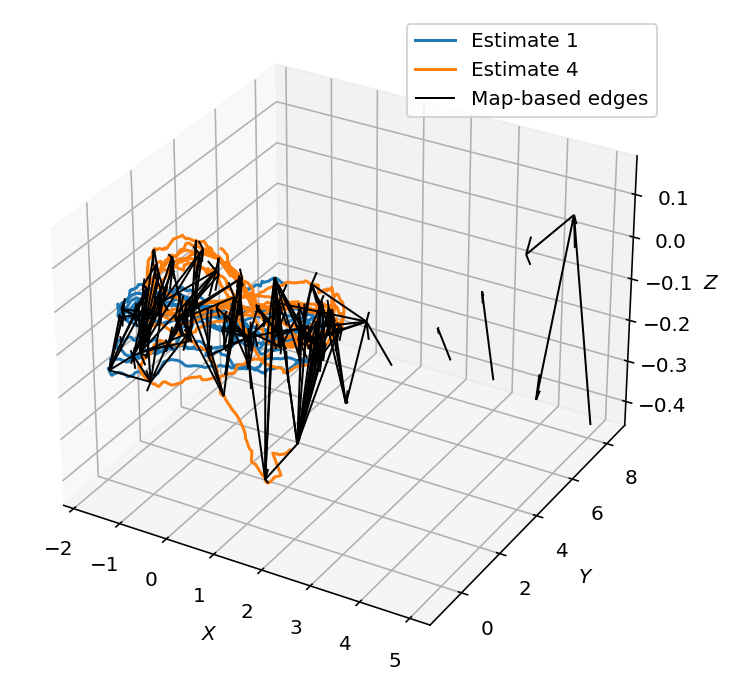

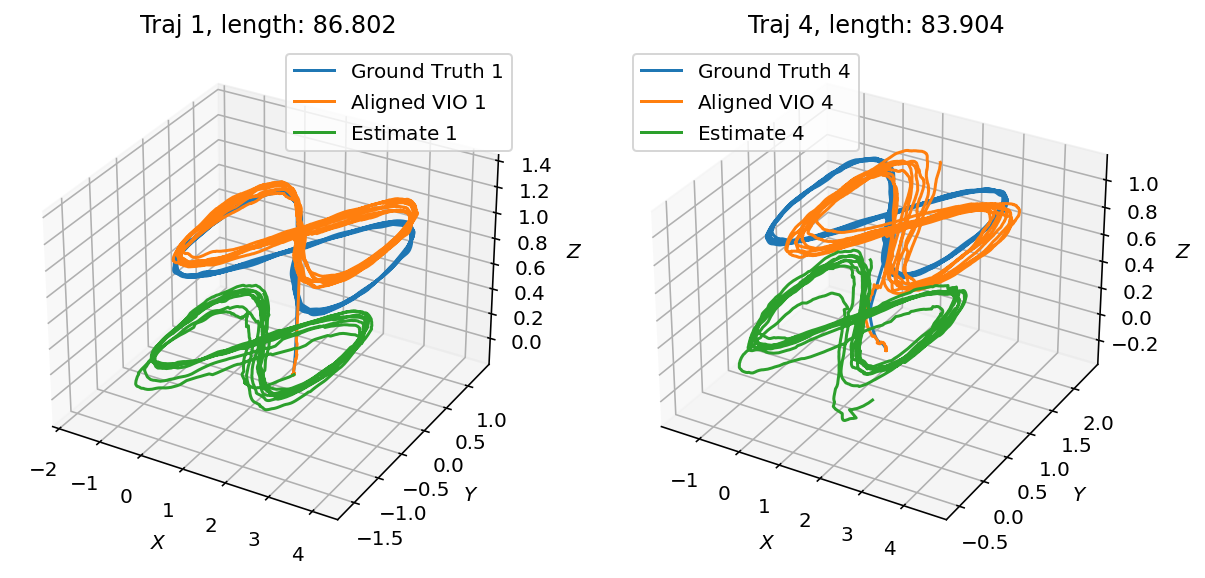

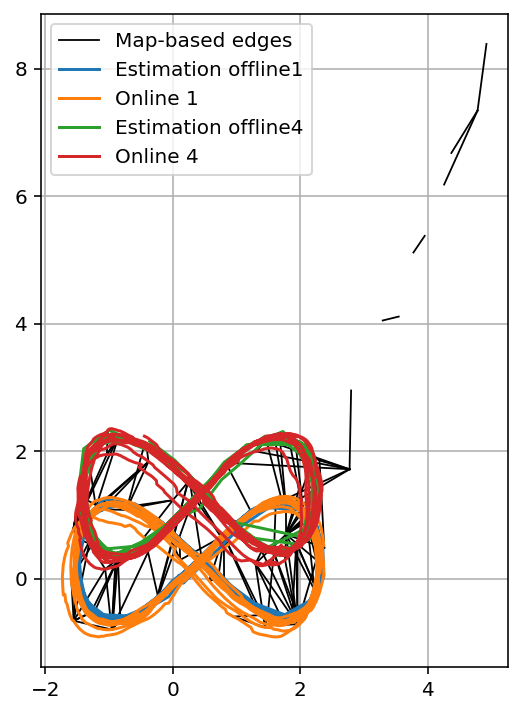

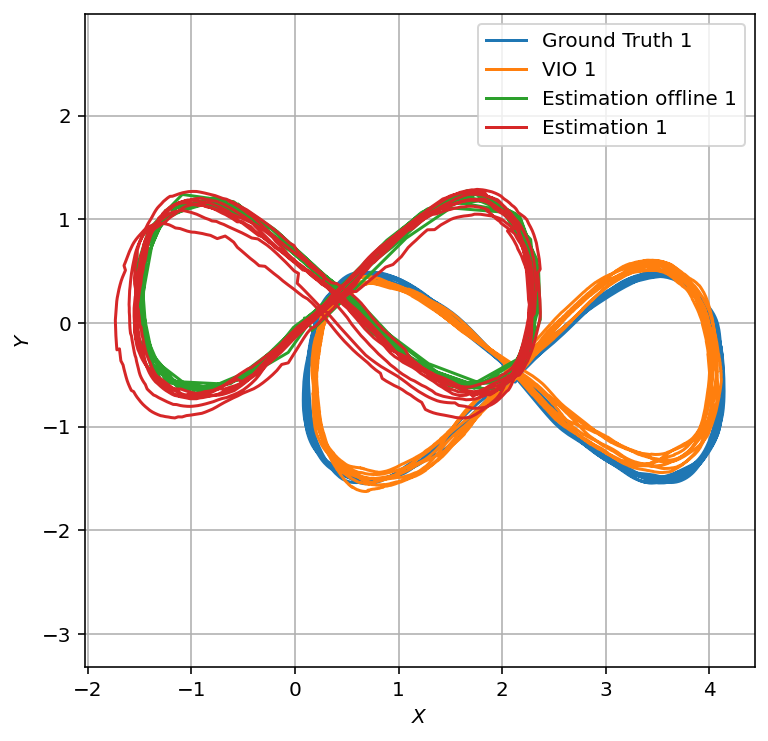

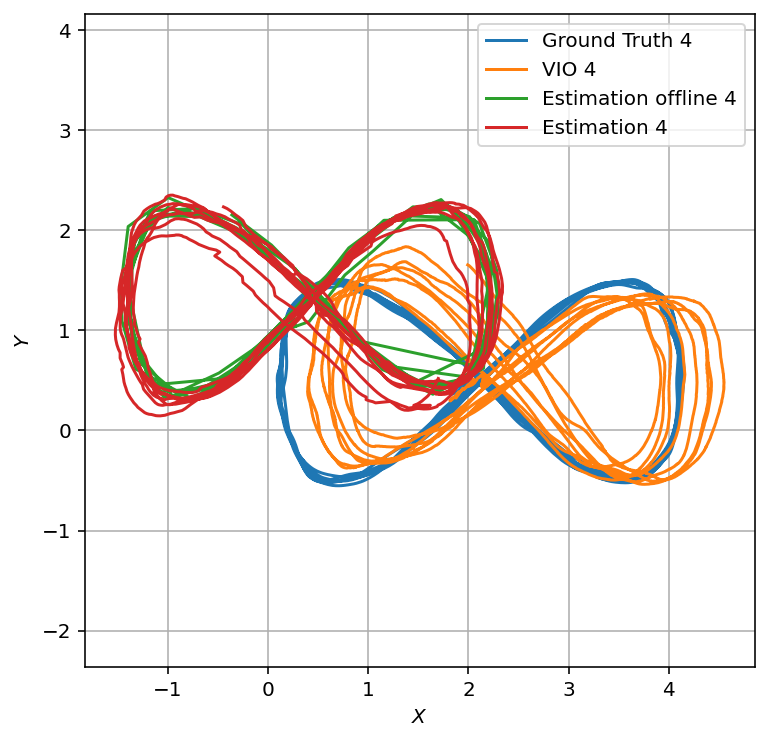

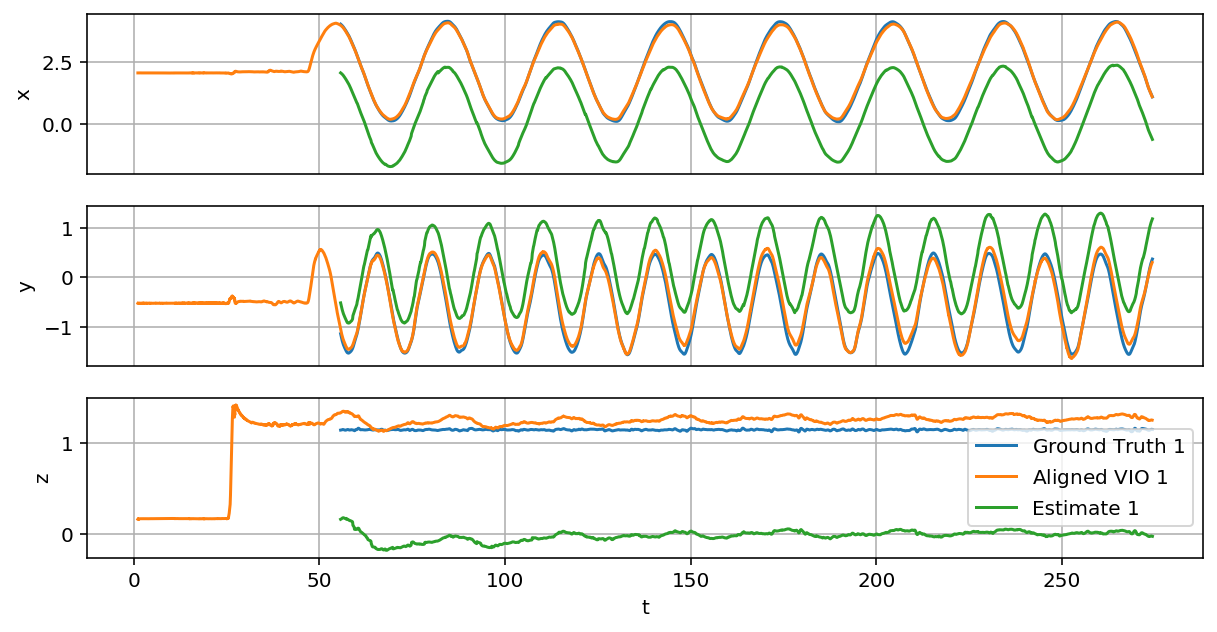

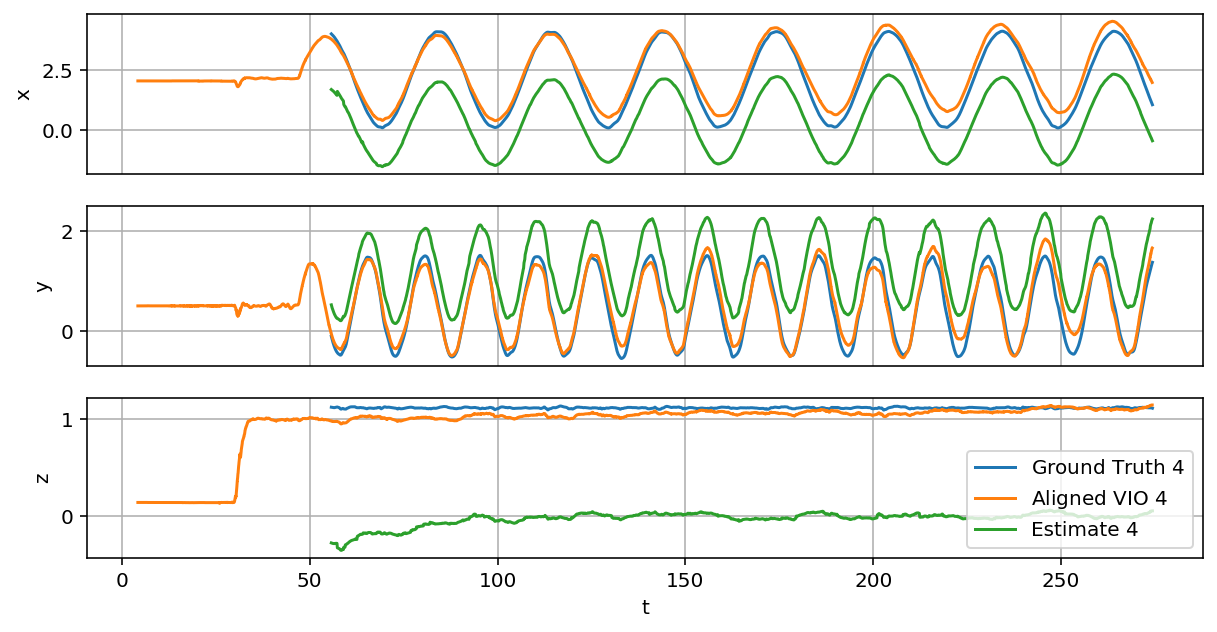

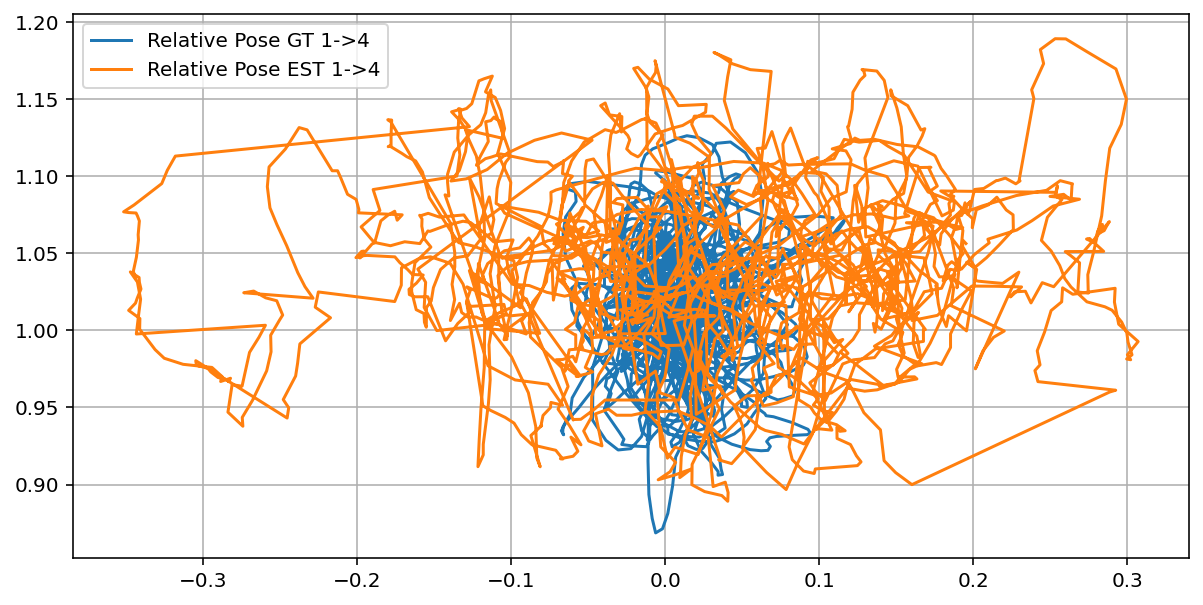

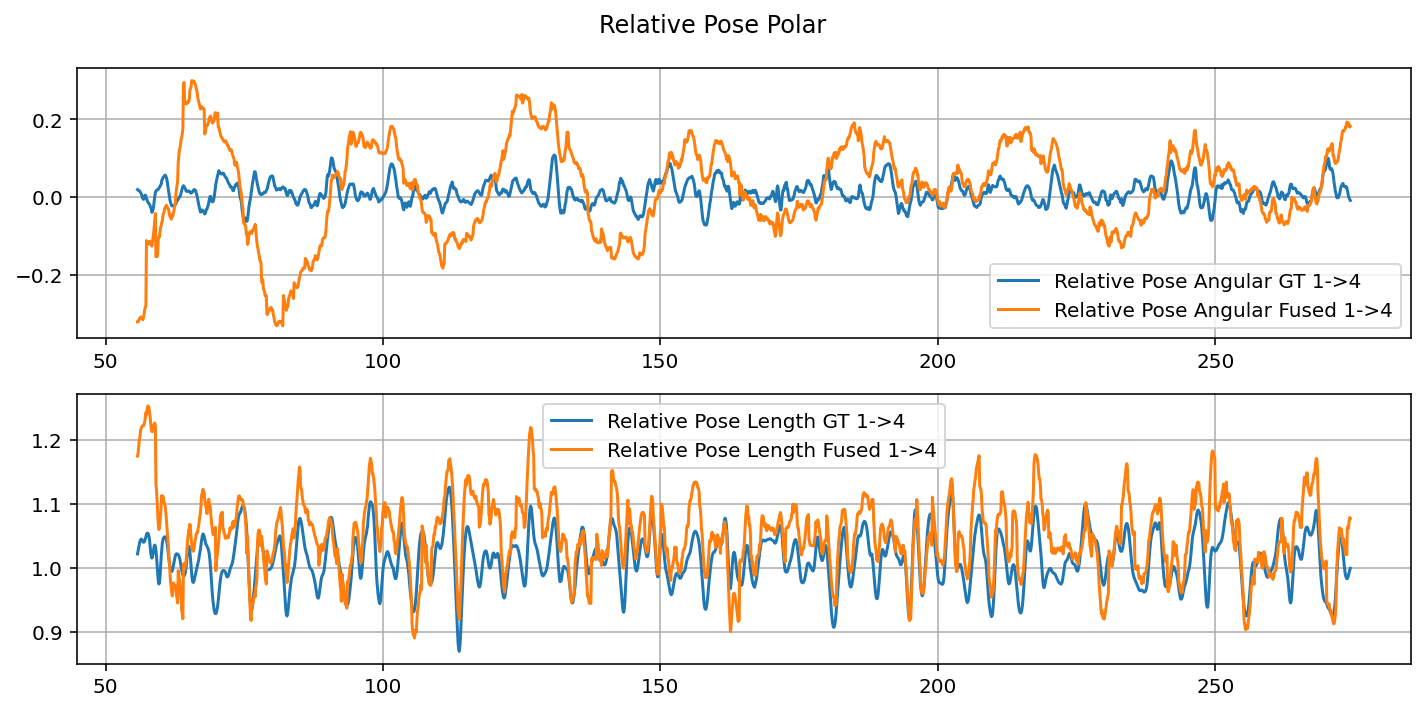

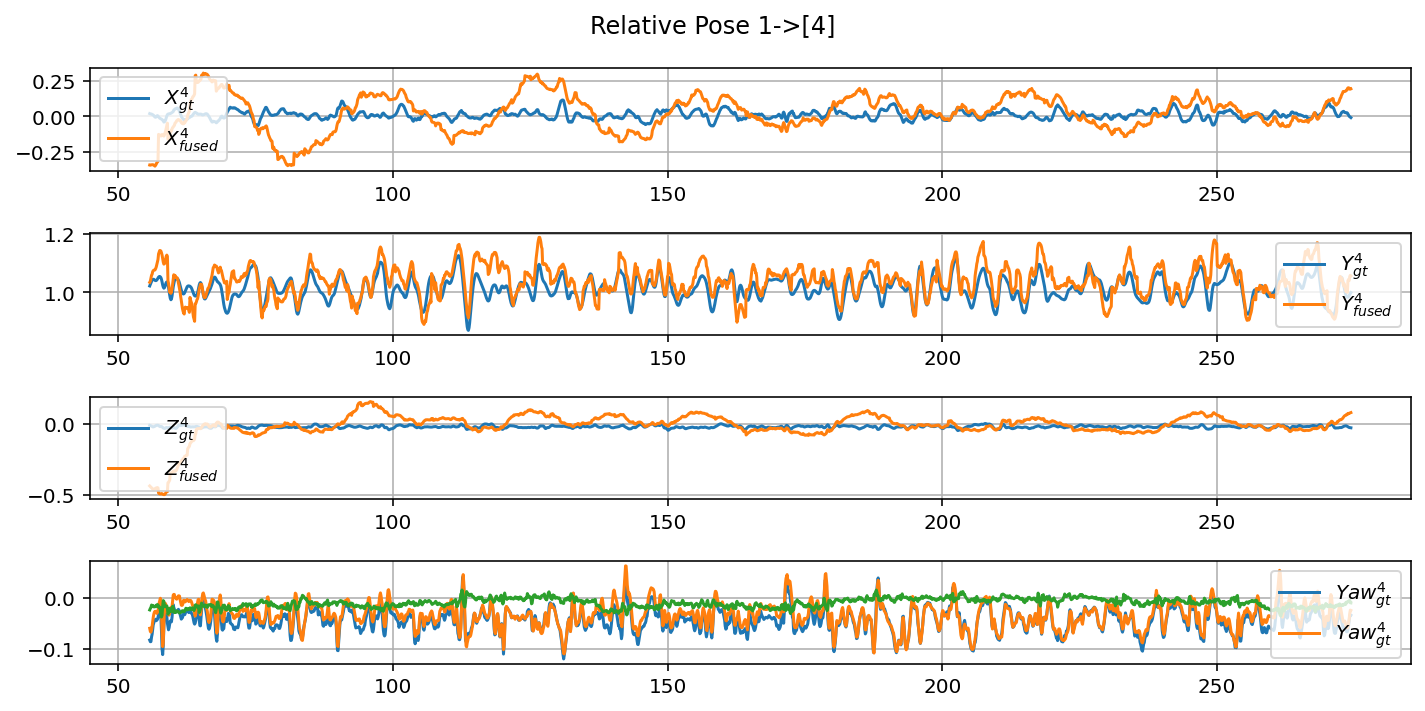

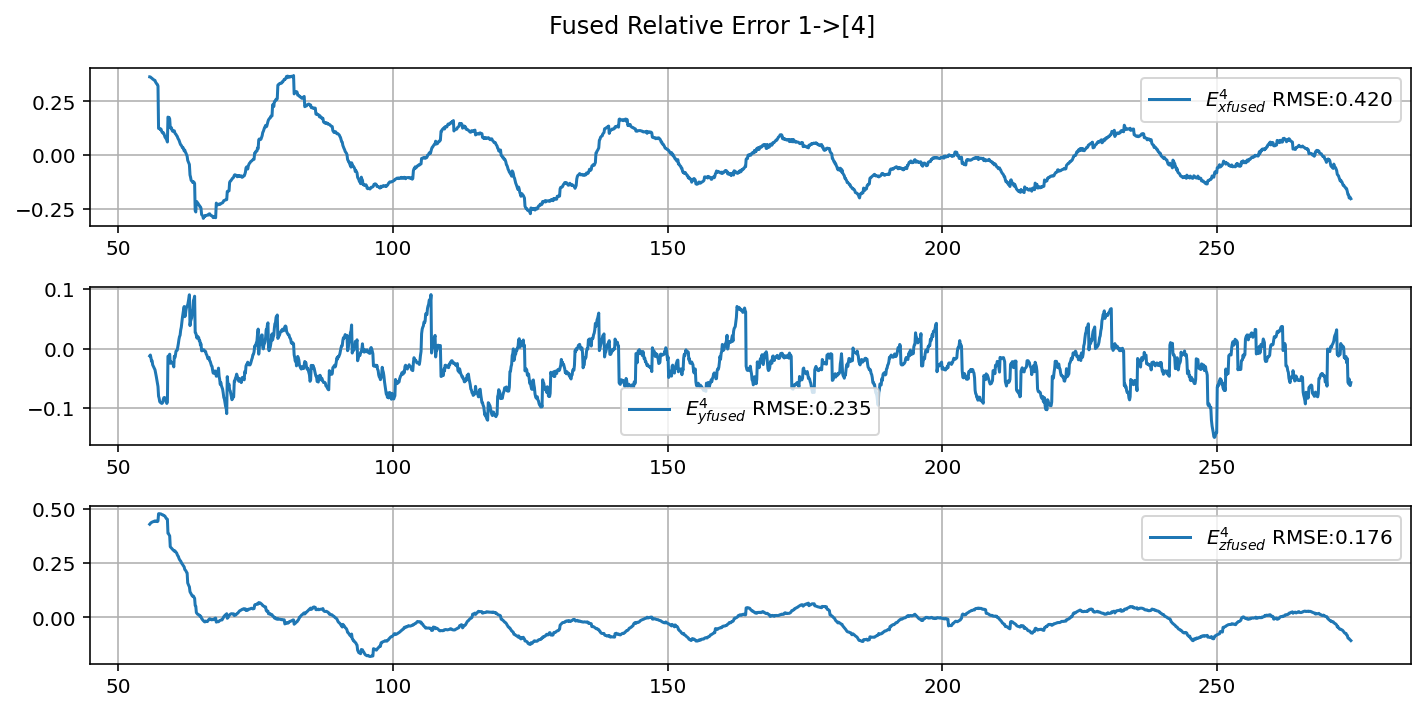

In [75]:
plt.close('all')
plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes, use_offline=True)
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes ,show=False)
plot_relative_pose_err(poses, poses_fused, poses_vo, 1, [4])
plt.show()

Outlier rate 6.25% total loops 240 inter_loops 118 outlier_num 15
Pos cov 0.016, 0.073, 0.001
Yaw cov 0.042
PCM loops 99


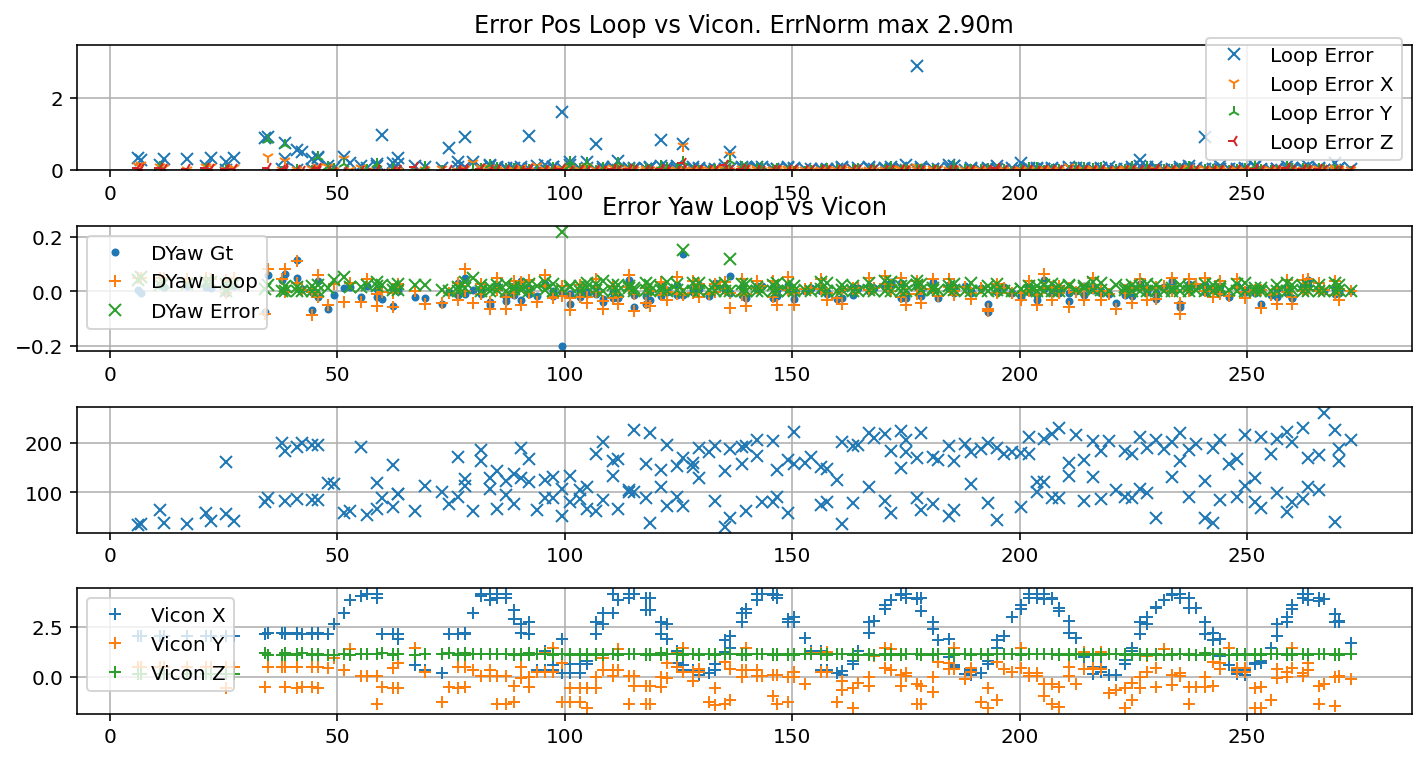

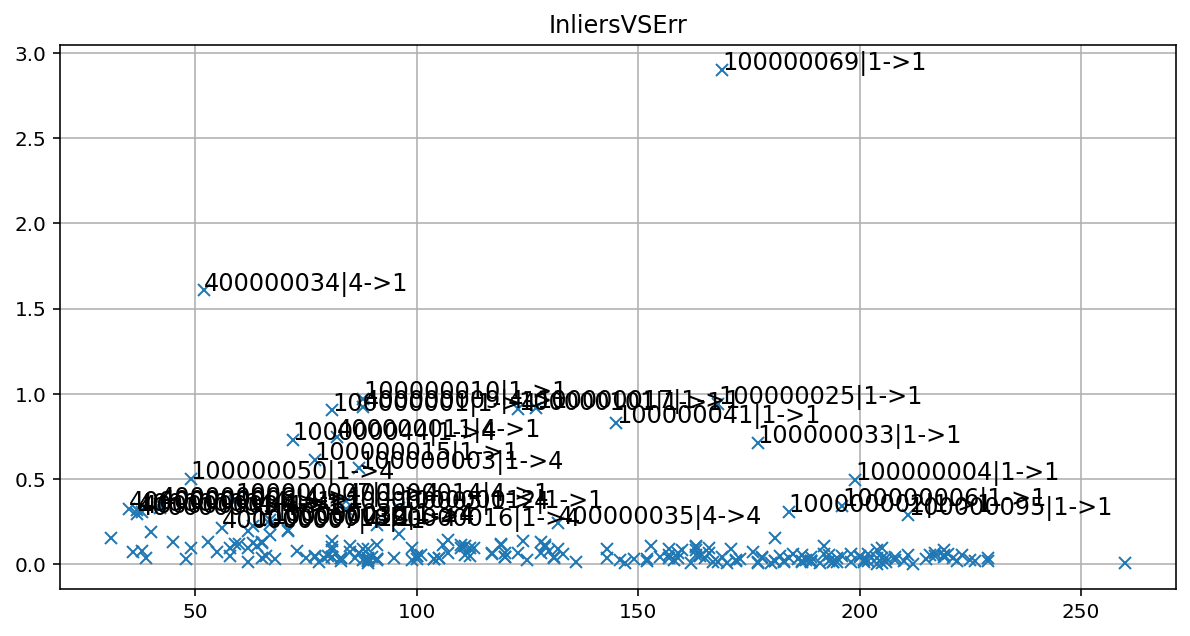

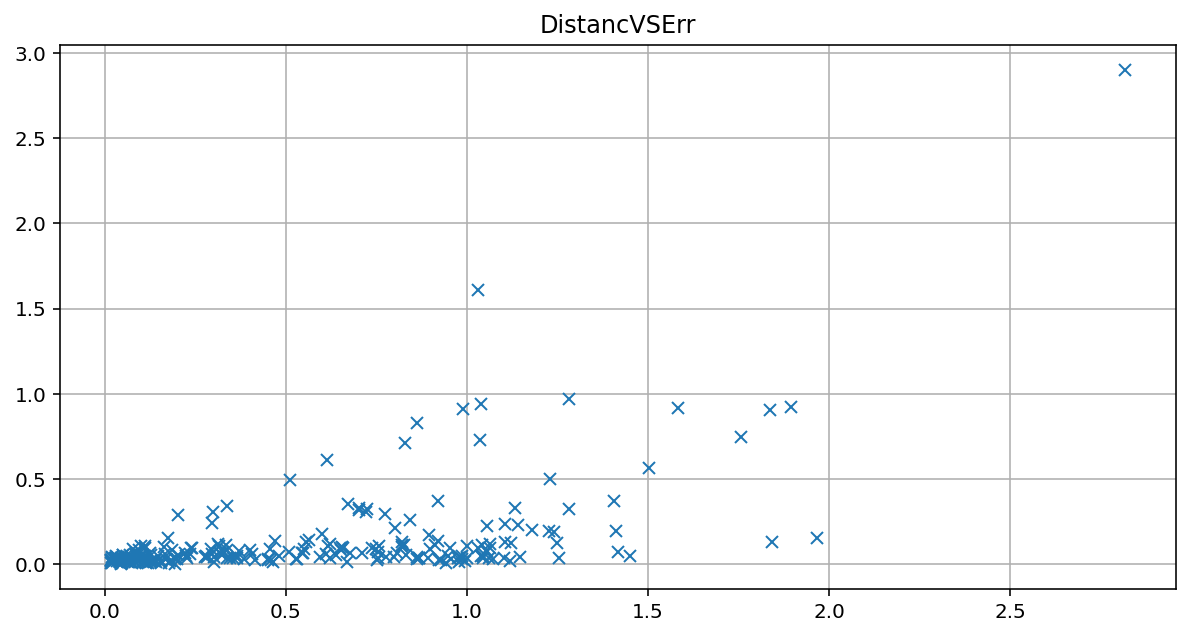

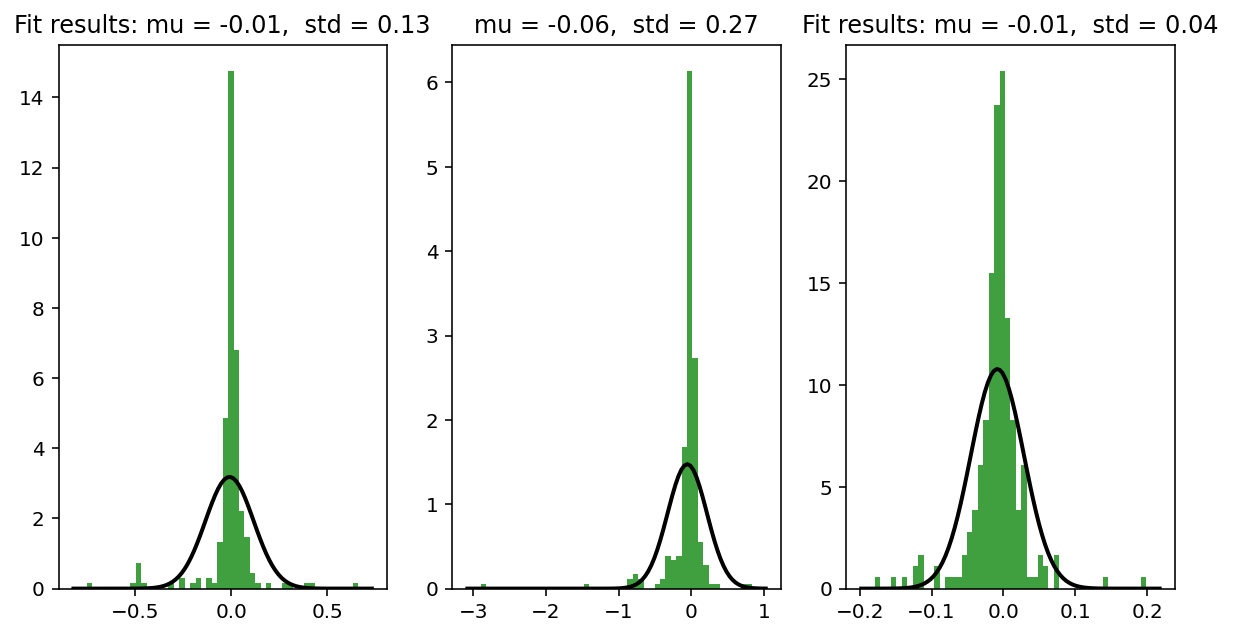

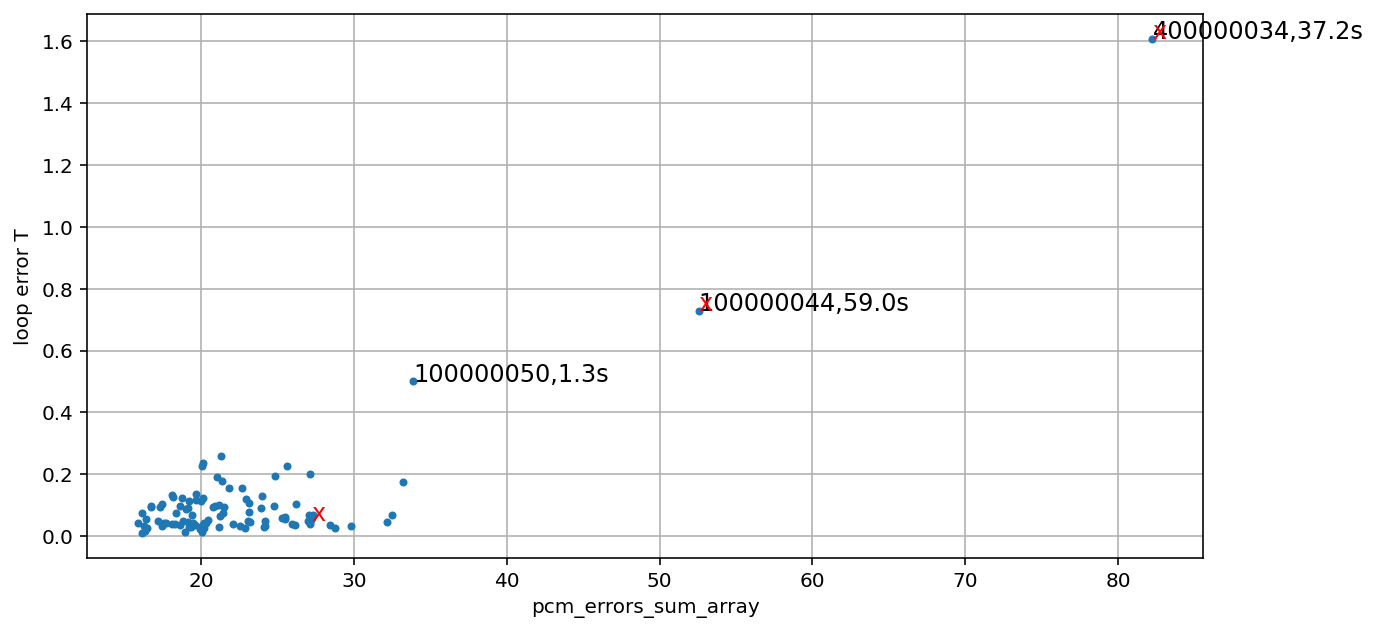

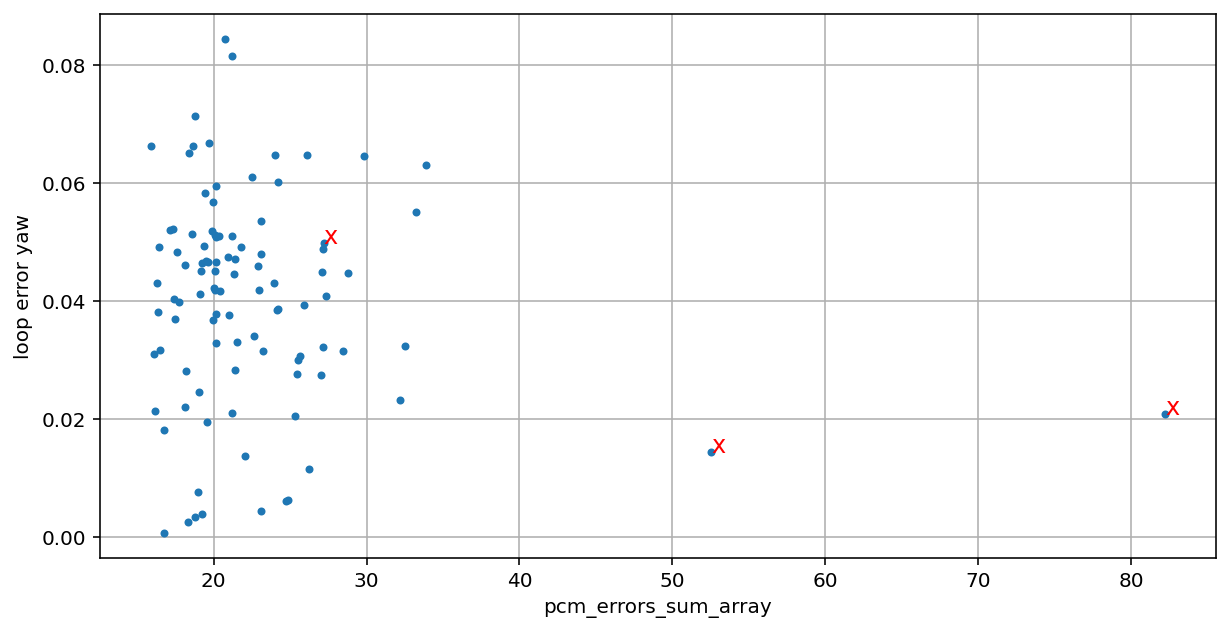

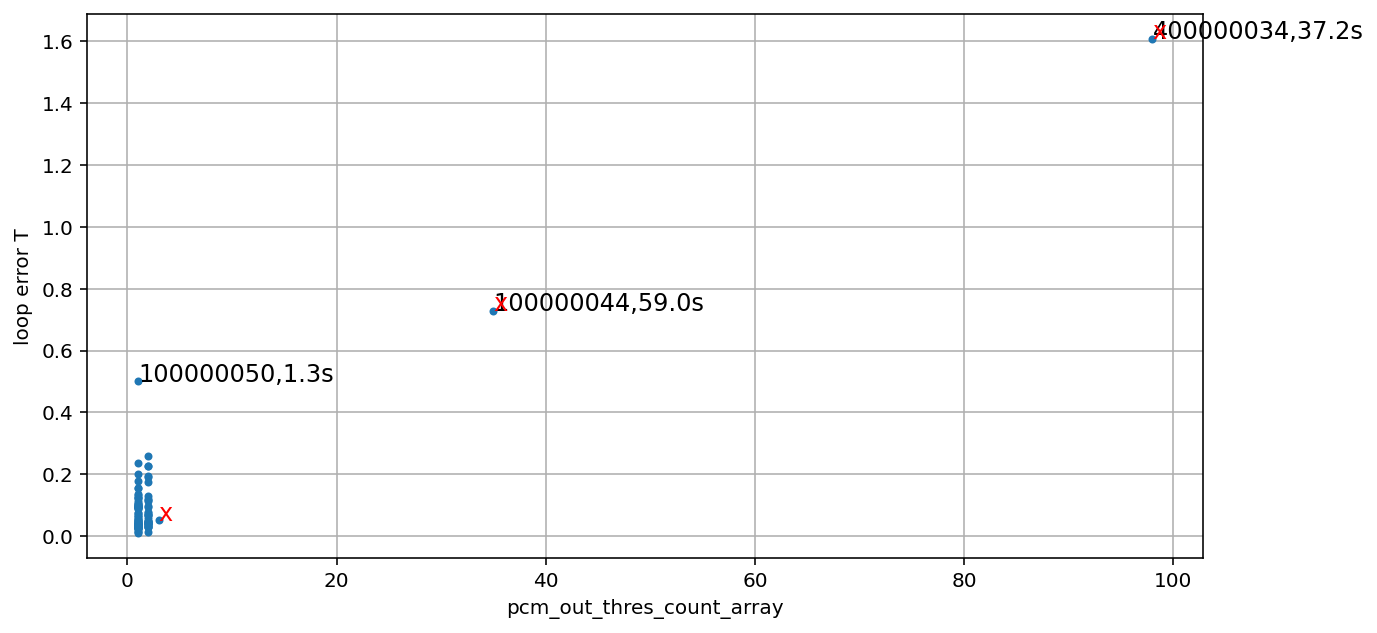

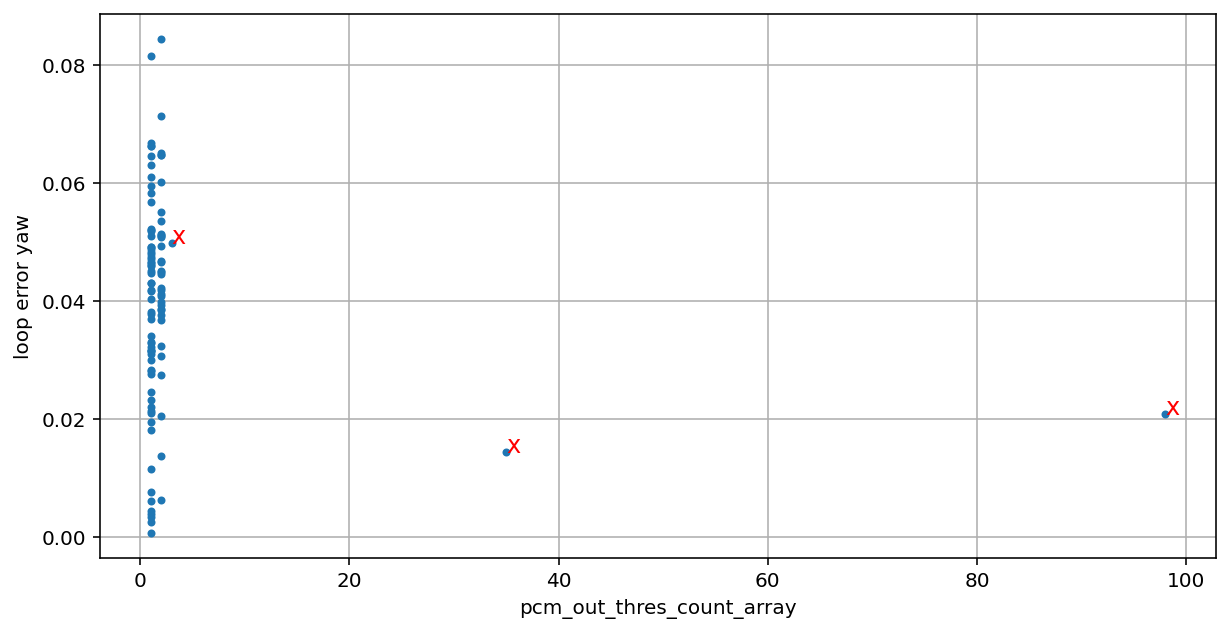

In [74]:
plt.close("all")
loops_error = plot_loops_error(poses, loops)
pcm_errors = debugging_pcm("/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_16-57/loop_only/swarm1/", loops_error, 0.6)

In [27]:
plt.close("all")
plot_detections_error(poses, poses_vo, detections, nodes, main_id, t_calib, False)

Total detection 34


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Mean [-0.03453801 -0.00016916 -0.01595056]
Pos cov 0.0005813199370671816 0.00031673289879725436 0.005121676778859121


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


INV DEPS ERR Variance 0.008176202427435941


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


Dep ERR MEAN -0.1589998291831044
DEPS ERR Variance 0.03272589523447834


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

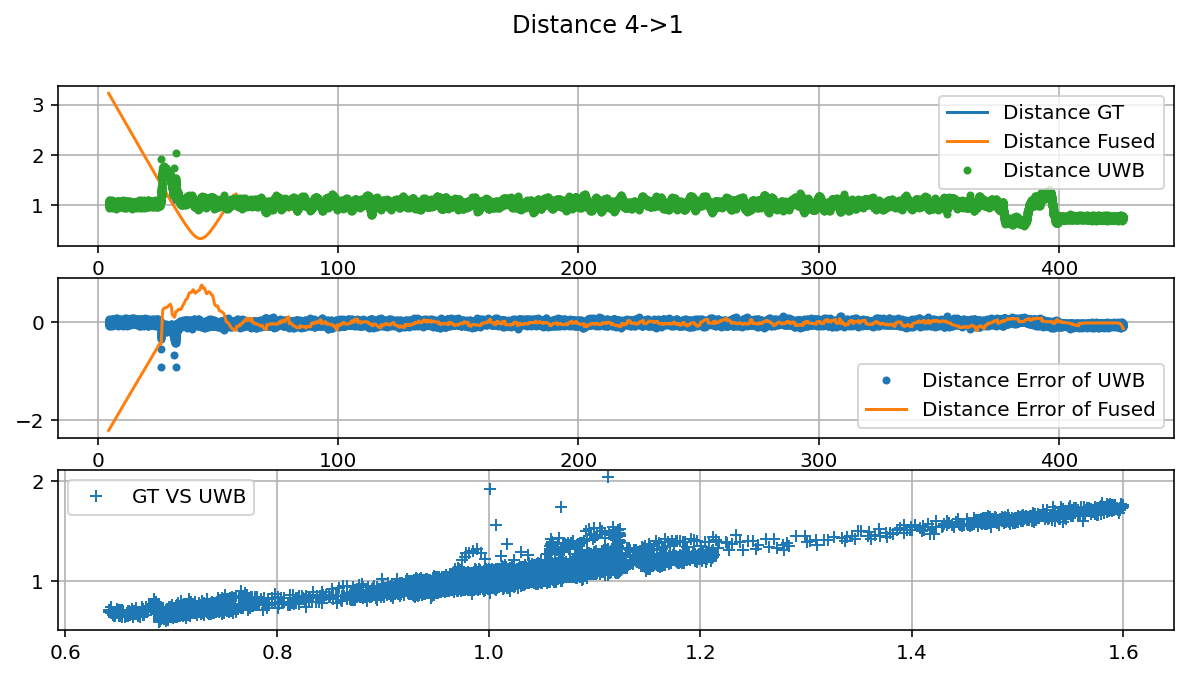

Distance 4->1 RMSE 0.0476841374566308
Fit 0.0854947000208889, 0.8883498323728104
mu = -0.00,  std = 0.04


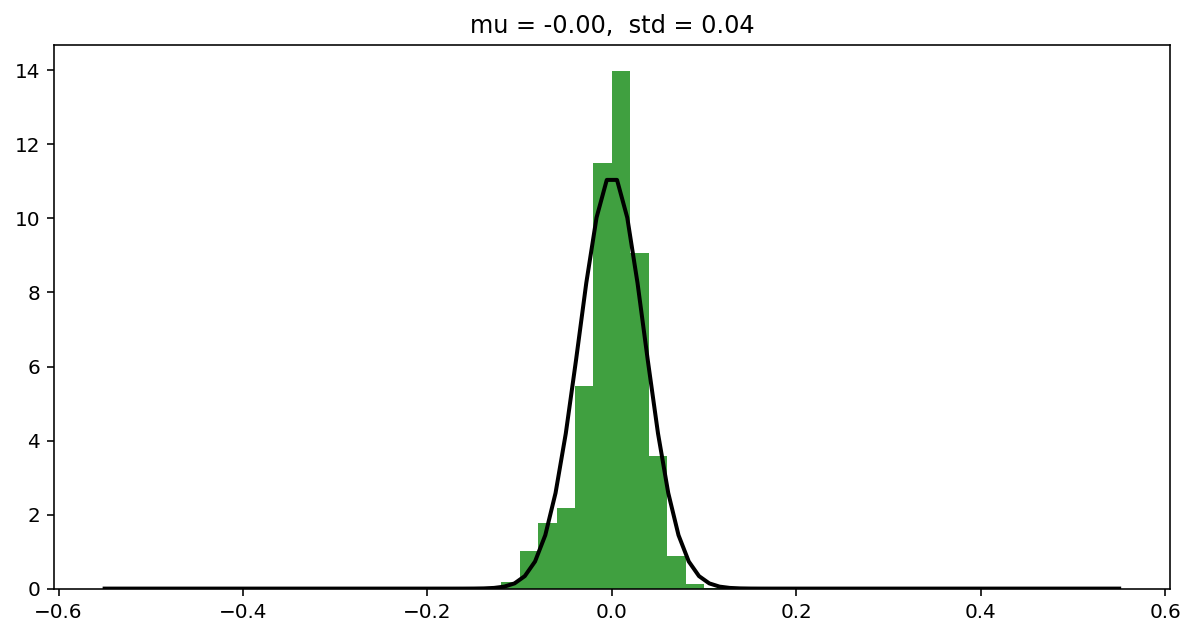

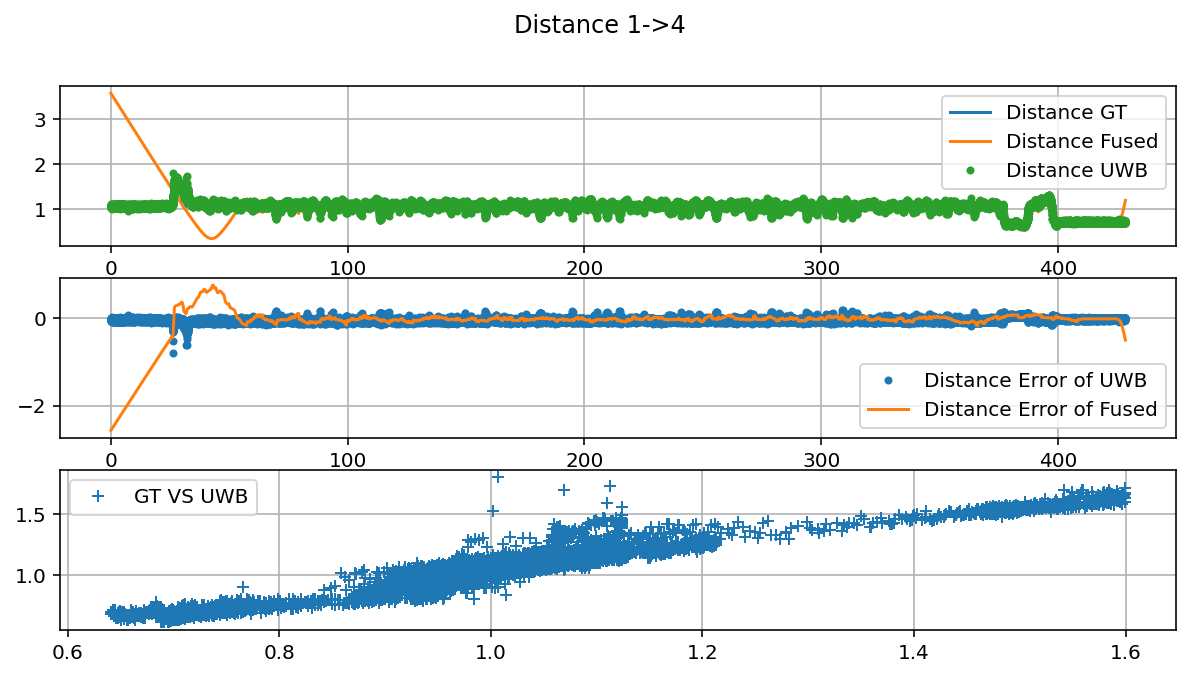

Distance 1->4 RMSE 0.06829771868339243
Fit 0.10838740102531964, 0.8415872931978011
mu = -0.00,  std = 0.03


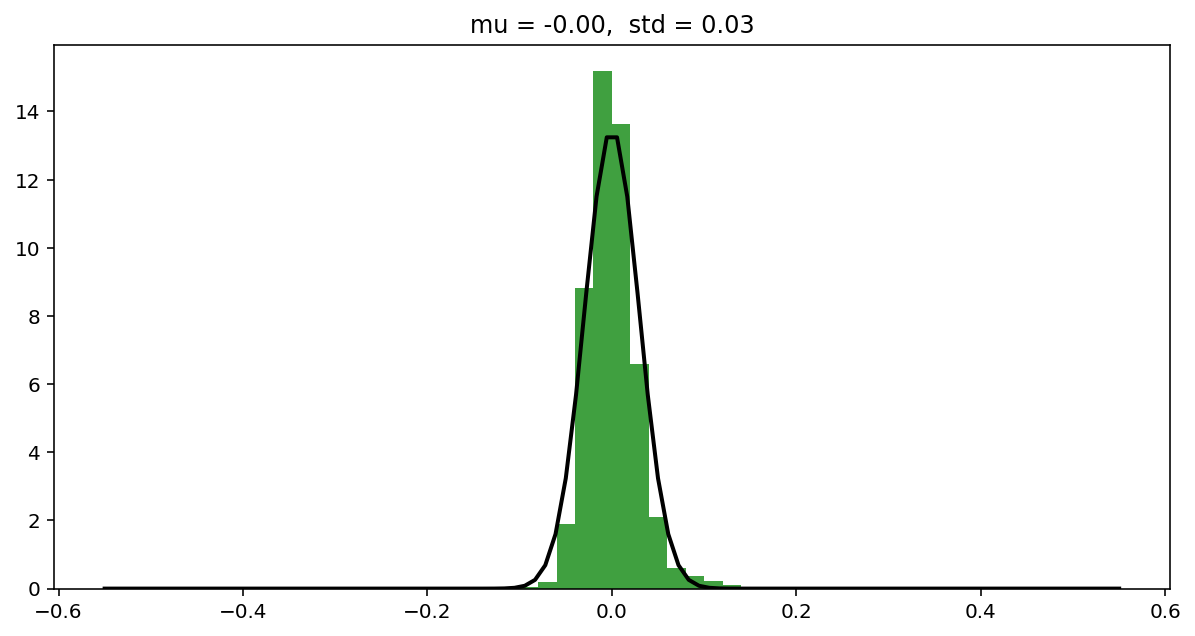

In [35]:
plt.close("all") 
plot_distance_err(poses, poses_fused, distances, main_id, nodes, is_show=True)

In [72]:
loops_id = {loop["id"]:loop for loop in loops}

In [73]:
loops_id

{400000000: {'ts_a': 1.7121758460998535,
  'ts_b': 6.045800447463989,
  'id_a': 4,
  'id_b': 1,
  'dpos': array([-0.09157521, -0.71820375, -0.02814925]),
  'dyaw': 0.004706164419479081,
  'id': 400000000,
  'pnp_inlier_num': 35},
 400000001: {'ts_a': 6.807929754257202,
  'ts_b': 6.045800447463989,
  'id_a': 4,
  'id_b': 1,
  'dpos': array([-0.12068381, -0.76534089, -0.00105722]),
  'dyaw': -0.005467232275548032,
  'id': 400000001,
  'pnp_inlier_num': 37},
 400000002: {'ts_a': 1.7121758460998535,
  'ts_b': 11.04594373703003,
  'id_a': 4,
  'id_b': 1,
  'dpos': array([-0.051645  , -1.10223194, -0.03356725]),
  'dyaw': 0.023828110258003944,
  'id': 400000002,
  'pnp_inlier_num': 65},
 400000003: {'ts_a': 11.906224966049194,
  'ts_b': 6.045800447463989,
  'id_a': 4,
  'id_b': 1,
  'dpos': array([-3.50373542e-02, -7.19431603e-01,  2.05590646e-04]),
  'dyaw': 0.016349089432496997,
  'id': 400000003,
  'pnp_inlier_num': 38},
 400000004: {'ts_a': 17.00575089454651,
  'ts_b': 6.045800447463989,